# Machine Learning Spring 2025

> **Project 1 - Temperature Prediction**<br><br>Team: ST_ML2025_2

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math

In [77]:
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [78]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [79]:
train_df = pd.read_csv("input/train_dataset.csv")
test_df = pd.read_csv("input/test_dataset.csv")

# Dataset 분석

주어진 데이터셋의 구성은 다음과 같다.

- `train_dataset.csv`: 동두천, 서울, 강화, 인천, 이천, 양평 관측소의 2019-2024년 데이터셋
- `test_dataset.csv`: 파주, 수원 관측소 데이터셋
- `station_info.csv`: 기상 관측소별 정보

In [80]:
train_df.sample(10)

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
10635,15014,202,양평,02-27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.7,1.2,1.4,1.5,2.4,1.4,4.578571,0.521429
12147,16526,203,이천,04-21,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.3,0.5,0.0,0.2,0.4,0.9,15.205357,0.194643
2494,4682,108,서울,11-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,2.4,2.5,2.2,1.9,2.5,1.4,2.2,10.255357,2.144643
11241,15620,203,이천,10-28,0.0,0.0,0.0,0.0,0.0,1.0,...,0.9,0.1,0.4,0.2,0.0,0.1,0.9,0.7,11.508929,0.191071
8021,12400,201,강화,12-26,0.0,0.0,3.0,7.0,7.0,8.0,...,0.6,0.6,0.7,1.0,0.6,0.9,0.4,0.6,-3.485714,-1.714286
4140,6328,108,서울,05-07,10.0,10.0,9.0,9.0,9.0,7.0,...,2.7,1.5,2.1,1.1,1.8,1.9,2.8,3.7,15.046429,-0.346429
11253,15632,203,이천,11-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.3,0.2,0.2,0.0,0.2,0.6,8.169643,-2.469643
9572,13951,202,양평,03-29,9.0,9.0,0.0,0.0,0.0,0.0,...,0.5,3.6,2.6,2.1,1.3,2.2,1.4,1.0,9.332143,1.267857
9608,13987,202,양평,05-04,6.0,10.0,10.0,10.0,9.0,10.0,...,0.1,0.4,1.0,0.6,0.9,0.3,1.3,2.0,16.385714,-1.785714
1458,1458,98,동두천,12-30,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.6,0.0,0.1,0.3,0.3,0.1,-4.487500,0.787500


In [81]:
train_df.describe()

,id,station,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
count,13132.000000,13132.000000,12945.000000,12920.000000,12916.000000,12926.000000,12931.000000,12926.000000,12919.000000,12938.000000,...,13122.000000,13120.000000,13116.000000,13112.000000,13119.000000,13120.000000,13125.000000,13127.000000,13132.000000,13132.000000
mean,9484.110493,153.980658,2.915798,3.022291,3.126742,3.092063,3.046400,3.035046,2.992182,2.911115,...,-0.032754,-2.491814,-0.234637,-1.011882,-4.068389,-7.119787,-10.073272,-9.119029,12.658557,0.221979
std,5311.954253,48.183220,3.646779,3.652165,3.659422,3.589739,3.512063,3.483002,3.462070,3.440298,...,123.464434,195.197628,123.489868,151.258218,230.949420,289.453706,337.895538,326.432094,10.023504,2.960544
min,0.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-4.487500,-12.864286
25%,5470.750000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.700000,3.292857,-1.643052
50%,8753.500000,112.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.200000,1.000000,0.900000,0.900000,0.900000,0.900000,1.000000,1.300000,12.842857,0.157143
75%,14227.250000,202.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,...,2.100000,1.900000,1.900000,1.800000,1.800000,1.800000,2.000000,2.200000,22.271429,2.045536
max,17510.000000,203.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.700000,11.300000,9.500000,10.600000,12.400000,11.100000,11.300000,9.400000,28.455357,11.778571


In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 342 entries, id to target
dtypes: float64(338), int64(2), object(2)
memory usage: 34.3+ MB


## Feature 분석

### Feature 분류 및 설명

In [83]:
def search_time_based_feature_names(df):
    "각 시간별로 구성된 feature들(e.g. 'cloud_cover_0', 'cloud_cover_1' ...)에 대해 각각의 고유한 이름(e.g. 'cloud_cover')을 찾는다."

    time_based_features_pattern = re.compile(r"^(.*)_(\d{1,2})$")
    searched_time_based_feature_names = set()

    for column in df.columns:
        match = time_based_features_pattern.match(column)
        if match:
            feature_name, hour = match.groups()
            hour = int(hour)
            searched_time_based_feature_names.add(feature_name)

    return searched_time_based_feature_names

time_based_feature_names = search_time_based_feature_names(train_df)

print(len(time_based_feature_names))
print(time_based_feature_names)

14
{'surface_temp', 'sunshine_duration', 'sea_level_pressure', 'vapor_pressure', 'local_pressure', 'dew_point', 'wind_speed', 'min_cloud_height', 'wind_direction', 'visibility', 'cloud_cover', 'precipitation', 'snow_depth', 'humidity'}


train dataset에 있는 feature를 특성에 따라 다음과 같은 카테고리별로 정리하였다.

1. Data 식별
   - `id`: 순서(identical)
   - `station`: 지상관측소 번호(98: "동두천", 201: "강화" 등)
   - `station_name`: 지상관측소 이름("동두천", "서울", "강화" 등)
   - `date`: 날짜(월-일 형식, 1월 29일은 "01-29"로 표기)

2. 구름 관련 feature
    - `cloud_cover_[0-23]`: 증하층운량(10분위, 0~10)
    - `min_cloud_height_[0-23]`: 시간별 최저운고(100m 단위)

3. 온도 관련 feature
    - `dew_point_[0-23]`: 시간별 이슬점 온도(°C)
    - `surface_temp_[0-23]`: 시간별 지면온도(°C)
    - `climatology_temp`: 해당 날짜의 평균 기온(°C) (7년 동안 평균)

4. 습도 관련 feature
    - `humidity_[0-23]`: 시간별 습도(%)
    - `vapor_pressure_[0-23]`: 시간별 증기압(hPa)
    - `percipitation_[0-23]`: 시간별 강수량(mm)
    - `snow_depth_[0-23]`: 시간별 적설(cm)

5. 기압 관련 feature
    - `local_pressure_[0-23]`: 시간별 현지기압(hPa)
    - `sea_level_pressure_[0-23]`: 시간별 해면기압(hPa)

6. 가시성 관련 feature
    - `visibility_[0-23]`: 시간별 시정(10m 단위)
    - `sunshine_duration_[0-23]`: 시간별 일조(hr)

7. 바람 관련 feature
    - `wind_speed_[0-23]`: 시간별 풍속(m/s)
    - `wind_direction_[0-23]`: 시간별 풍향(도 단위)

8. target feature
    - `target`: 시간별 기온(°C, 다음날 평균 기온(°C)에서 `climatology_temp`를 뺀 값)


### 결측치 패턴

1. `-9999`: 관측소 기계에서 감지한 결측치 또는 이상치
2. `NaN`:
    - `sunshine_duration`: 야간 시간대(0, 1, 2, 3, 4, 5, 22, 23시), 즉 해가 없는 시간대
    - `snow_depth`: 눈이 오지 않은 경우
    - `precipitation`: 비가 오지 않은 경우




### 결측치 식별

#### Time-based feature에 대한 결측치
**시간대별 결측률 분석**

In [84]:
def analyze_time_based_features_missing_by_hour(ax, df, base_name):
    hour_missing = {}

    cols = [col for col in df.columns if col.startswith(base_name + "_")]

    for col in cols:
        try:
            hour = int(col.split("_")[-1])
            missing_ratio = df[col].isnull().mean()
            hour_missing[hour] = missing_ratio
        except ValueError:
            continue

    hours = sorted(hour_missing.keys())
    missing_values = [hour_missing[h] for h in hours]

    sns.lineplot(x=hours, y=missing_values, marker="o", ax=ax, color="steelblue")
    ax.set_title(f"{base_name}")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Missing Ratio")
    ax.set_xticks(hours)
    ax.set_ylim(0, max(missing_values) + 0.0025)
    ax.grid(True, linestyle="--", alpha=0.5)

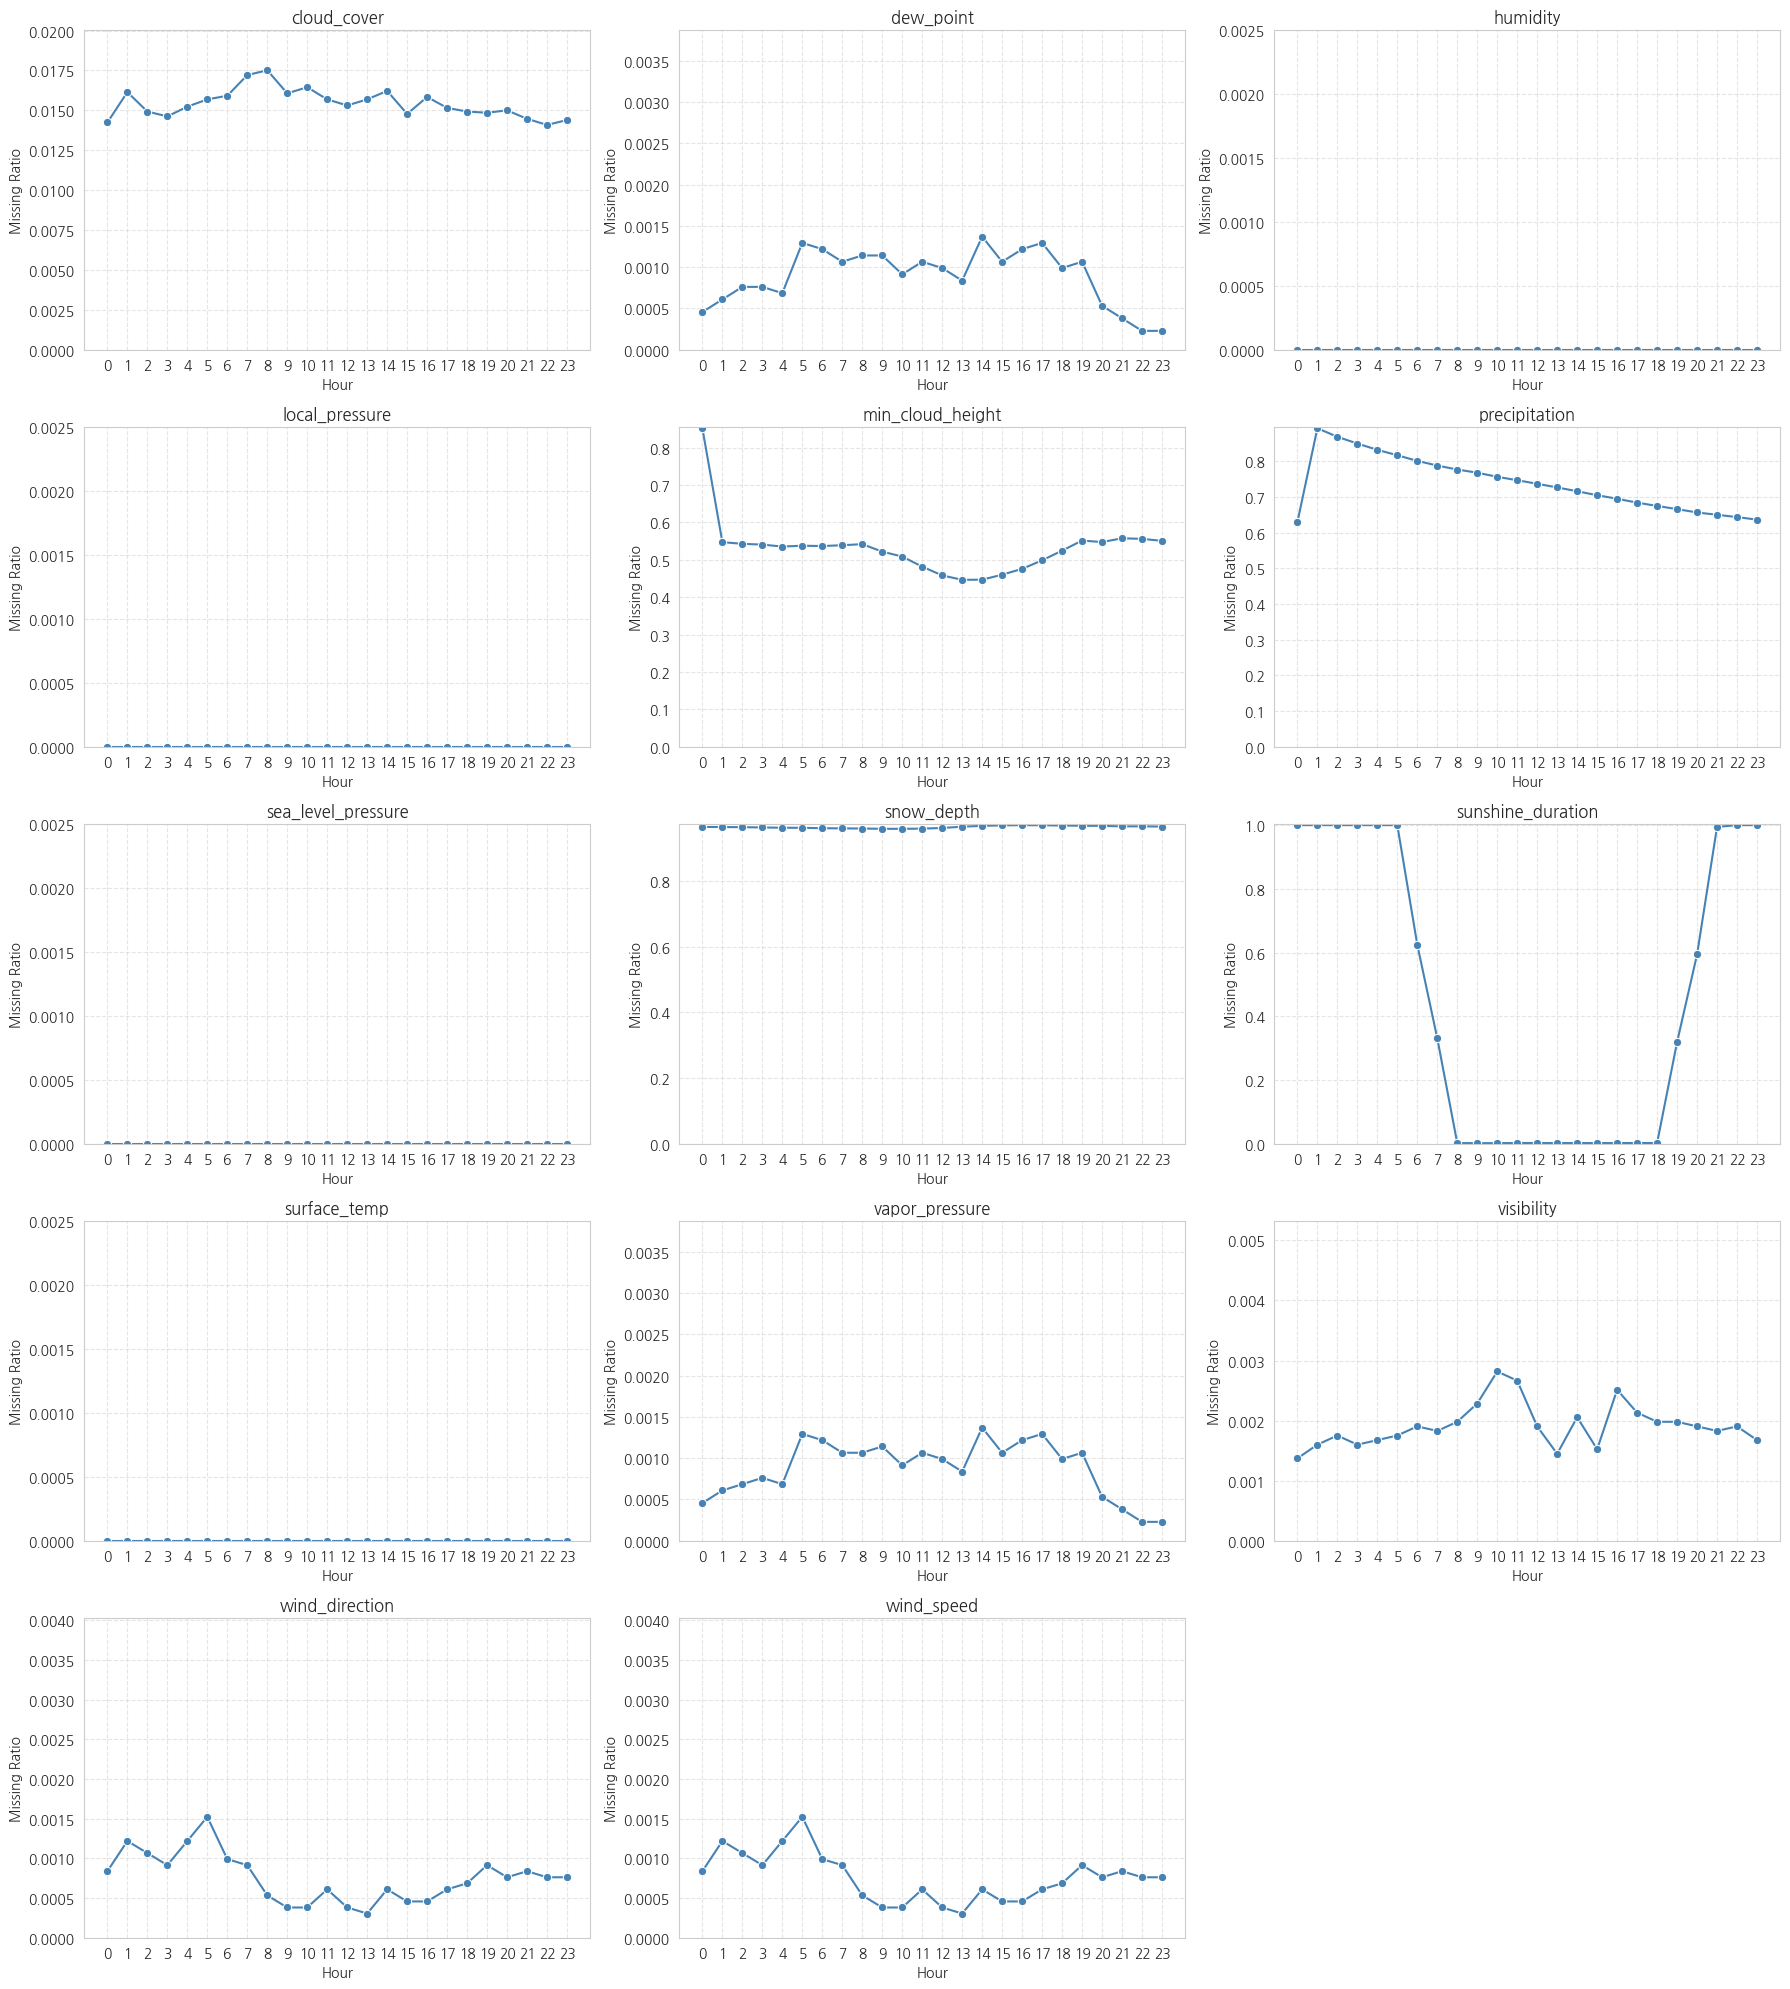

In [85]:
num_features = len(time_based_feature_names)
n_cols = 3
n_rows = math.ceil(num_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(sorted(time_based_feature_names)):
    analyze_time_based_features_missing_by_hour(axes[i], train_df, feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Time-based feature 종류별 평균 결측치 비율**

In [86]:
def analyze_missing_values_by_time_groups(df, time_based_feature_names):
    group_missing_summary = []

    for base_name in time_based_feature_names:
        cols = [col for col in df.columns if col.startswith(base_name + "_")]
        if not cols:
            continue
        missing_ratio = df[cols].isnull().mean().mean()  # 각 시간대의 평균 결측률
        group_missing_summary.append((base_name, missing_ratio))

    summary_df = pd.DataFrame(group_missing_summary, columns=["feature_group", "mean_missing_ratio"])
    summary_df = summary_df.sort_values(by="mean_missing_ratio", ascending=False).reset_index(drop=True)
    return summary_df

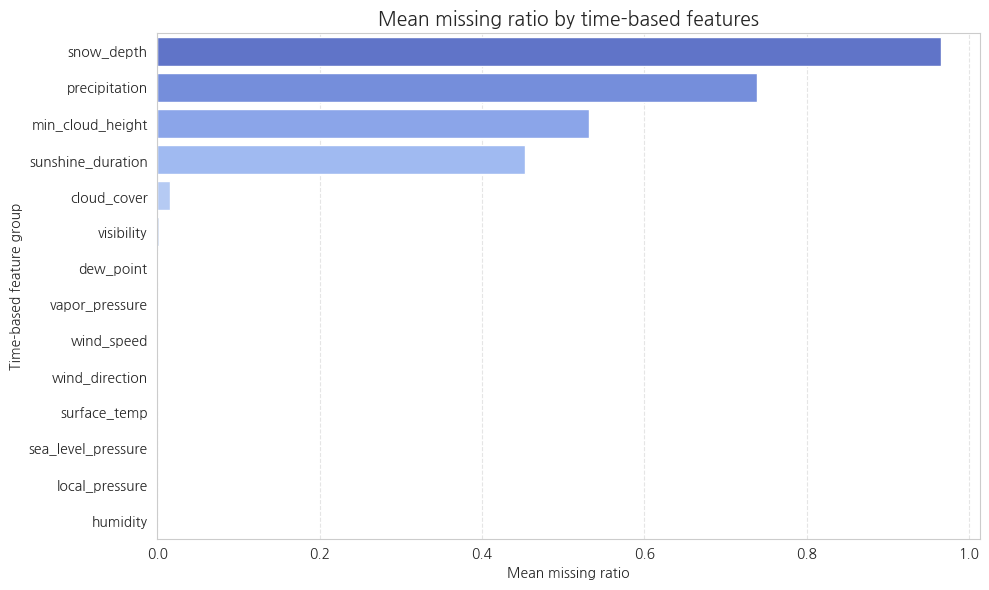

In [87]:
group_missing_ratio = analyze_missing_values_by_time_groups(train_df, time_based_feature_names)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=group_missing_ratio,
    x="mean_missing_ratio",
    y="feature_group",
    hue="feature_group",
    palette="coolwarm",
)
plt.title("Mean missing ratio by time-based features", fontsize=14)
plt.xlabel("Mean missing ratio")
plt.ylabel("Time-based feature group")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()